In [99]:
import sys
sys.path.append('../')

from model import *
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import pickle as pkl
import matplotlib.pyplot as plt
import sklearn

### Data

In [100]:
with open('../../../data/ChildWelfare/X_preprocess.pkl', 'rb') as handle:
    X,screener_ids,refer_ids,Y_obs,D,Y_serv,Y_sub,colnames = pkl.load(handle)

In [101]:
#drop instances if expert assessed a single case

drop_experts = []
for num in screener_ids:

    if screener_ids.count(num) < 10:

        drop_experts.append(num)

In [102]:
drop_idx = []
for index, elem in enumerate(screener_ids):
    if elem in drop_experts:
        drop_idx.append(index)

In [103]:
X = np.delete(X,drop_idx,axis=0)
Y_serv = np.delete(Y_serv,drop_idx,axis=0)
Y_sub = np.delete(Y_sub,drop_idx,axis=0)
Y_obs = np.delete(Y_obs,drop_idx,axis=0)
D = np.delete(D,drop_idx,axis=0)
refer_ids = np.delete(refer_ids,drop_idx,axis=0)
screener_ids = np.delete(screener_ids,drop_idx,axis=0)

In [104]:
X.shape

(46528, 216)

In [105]:
D = D.reshape((D.shape[0],))
Y_obs = Y_obs.reshape((Y_obs.shape[0],))

In [106]:
target = pd.DataFrame({'D': D, 'Y1': Y_obs, 'Y2': Y_serv, 'Y3': Y_sub})

Split data in a 80% train, 20% test

In [107]:
cov_train, cov_test, tar_train, tar_test, nur_train, nur_test = train_test_split(pd.DataFrame(X), target, pd.Series(screener_ids), test_size = 0.2, random_state = 0)

### Modelling

In [199]:
# Model's characteristics
#[(100,), (200,), (100,50), (200,50),(200,100),(200,100,50)]
params = {'layers': [100]} # If = [] equivalent to a simple logistic regression

# Amalgation parameters
rho = 0.02 # Control which point to consider from a confience point of view
pi_1 = 4.0 # Control criterion on centre mass metric
pi_2 = 0.8 # Control criterion on opposing metric
tau = 1.0  # Balance between observed and expert labels

##### 1. Train on decision

This model models the nurse decision based on covariates

In [200]:
for l1_penalty in [ 0.001, 0.01, 0.1]:
    try:
        model = BinaryMLP(**params)
        model = model.fit(cov_train, tar_train['D'], nur_train, l1_penalty = l1_penalty)
        break
    except Exception as e:
        print(e, l1_penalty)
        pass



















  0%|          | 0/1000 [00:00<?, ?it/s]

















Loss: 0.573:   0%|          | 0/1000 [00:01<?, ?it/s]

















Loss: 0.573:   0%|          | 1/1000 [00:01<18:50,  1.13s/it]

















Loss: 0.545:   0%|          | 1/1000 [00:02<18:50,  1.13s/it]

















Loss: 0.545:   0%|          | 2/1000 [00:02<18:17,  1.10s/it]

















Loss: 0.530:   0%|          | 2/1000 [00:03<18:17,  1.10s/it]

















Loss: 0.530:   0%|          | 3/1000 [00:03<17:53,  1.08s/it]

















Loss: 0.520:   0%|          | 3/1000 [00:04<17:53,  1.08s/it]

















Loss: 0.520:   0%|          | 4/1000 [00:04<17:35,  1.06s/it]

















Loss: 0.516:   0%|          | 4/1000 [00:05<17:35,  1.06s/it]

















Loss: 0.516:   0%|          | 5/1000 [00:05<17:31,  1.06s/it]

















Loss: 0.512:   0%|          | 5/1000 [00:06<17:31,  1.06s/it]

















Loss: 0.512:   1%|          | 6/1000 [00:06<17:28,  1.06s/it]



Loss: 0.491:   3%|▎         | 30/1000 [00:31<16:13,  1.00s/it]

















Loss: 0.491:   3%|▎         | 31/1000 [00:31<16:12,  1.00s/it]

















Loss: 0.495:   3%|▎         | 31/1000 [00:32<16:12,  1.00s/it]

















Loss: 0.495:   3%|▎         | 32/1000 [00:32<16:13,  1.01s/it]

















Loss: 0.495:   3%|▎         | 32/1000 [00:33<16:13,  1.01s/it]

















Loss: 0.495:   3%|▎         | 33/1000 [00:33<16:13,  1.01s/it]

















Loss: 0.496:   3%|▎         | 33/1000 [00:34<16:13,  1.01s/it]

















Loss: 0.496:   3%|▎         | 34/1000 [00:34<16:31,  1.03s/it]

















Loss: 0.491:   3%|▎         | 34/1000 [00:35<16:31,  1.03s/it]

















Loss: 0.491:   4%|▎         | 35/1000 [00:35<16:47,  1.04s/it]

















Loss: 0.492:   4%|▎         | 35/1000 [00:36<16:47,  1.04s/it]

















Loss: 0.492:   4%|▎         | 36/1000 [00:36<16:52,  1.05s/it]

















Loss: 0.492:   4%|▎         | 36/1000 [0

Loss: 0.487:   6%|▌         | 61/1000 [01:02<16:02,  1.02s/it]

















Loss: 0.488:   6%|▌         | 61/1000 [01:03<16:02,  1.02s/it]

















Loss: 0.488:   6%|▌         | 62/1000 [01:03<16:00,  1.02s/it]

















Loss: 0.479:   6%|▌         | 62/1000 [01:04<16:00,  1.02s/it]

















Loss: 0.479:   6%|▋         | 63/1000 [01:04<16:10,  1.04s/it]

















Loss: 0.481:   6%|▋         | 63/1000 [01:05<16:10,  1.04s/it]

















Loss: 0.481:   6%|▋         | 64/1000 [01:05<16:18,  1.05s/it]

















Loss: 0.481:   6%|▋         | 64/1000 [01:06<16:18,  1.05s/it]

















Loss: 0.481:   6%|▋         | 65/1000 [01:06<16:02,  1.03s/it]

















Loss: 0.481:   6%|▋         | 65/1000 [01:07<16:02,  1.03s/it]

















Loss: 0.481:   7%|▋         | 66/1000 [01:07<15:48,  1.02s/it]

















Loss: 0.484:   7%|▋         | 66/1000 [01:08<15:48,  1.02s/it]

















Loss: 0.484:   7%|▋         | 67/1000 [0

Loss: 0.497:   9%|▉         | 91/1000 [01:34<15:36,  1.03s/it]

















Loss: 0.497:   9%|▉         | 92/1000 [01:34<15:39,  1.04s/it]

















Loss: 0.501:   9%|▉         | 92/1000 [01:35<15:39,  1.04s/it]

















Loss: 0.501:   9%|▉         | 93/1000 [01:35<15:40,  1.04s/it]

















Loss: 0.499:   9%|▉         | 93/1000 [01:36<15:40,  1.04s/it]

















Loss: 0.499:   9%|▉         | 94/1000 [01:36<15:32,  1.03s/it]

















Loss: 0.483:   9%|▉         | 94/1000 [01:37<15:32,  1.03s/it]

















Loss: 0.483:  10%|▉         | 95/1000 [01:37<15:23,  1.02s/it]

















Loss: 0.492:  10%|▉         | 95/1000 [01:38<15:23,  1.02s/it]

















Loss: 0.492:  10%|▉         | 96/1000 [01:38<15:15,  1.01s/it]

















Loss: 0.504:  10%|▉         | 96/1000 [01:39<15:15,  1.01s/it]

















Loss: 0.504:  10%|▉         | 97/1000 [01:39<15:09,  1.01s/it]

















Loss: 0.499:  10%|▉         | 97/1000 [0

In [201]:
Y_pred_h_test = model.predict(cov_test)

In [202]:
# Naive performance
roc_auc_score(tar_test['Y1'], model.predict(cov_test))

0.676130099767664

In [203]:
# Yc performance
roc_auc_score(tar_test['Y2'], model.predict(cov_test))

0.8561492542414769

In [204]:
roc_auc_score(tar_test['Y3'], model.predict(cov_test))

0.9733901613037574

In [205]:
roc_auc_score(tar_test['D'], model.predict(cov_test))

0.8677943853737964

##### 2. Agreement computation 

Measure of agreeability are estimated in a cross validation fashion on the train set.

In [206]:
# Fold evaluation of influences
folds, predictions, influence = influence_cv(BinaryMLP, cov_train, tar_train['D'], nur_train, params = params, fit_params = {"l1_penalty": l1_penalty})




















  0%|          | 0/1000 [00:00<?, ?it/s]


















Loss: 0.588:   0%|          | 0/1000 [00:00<?, ?it/s]


















Loss: 0.588:   0%|          | 1/1000 [00:00<10:52,  1.53it/s]


















Loss: 0.556:   0%|          | 1/1000 [00:01<10:52,  1.53it/s]


















Loss: 0.556:   0%|          | 2/1000 [00:01<10:52,  1.53it/s]


















Loss: 0.539:   0%|          | 2/1000 [00:01<10:52,  1.53it/s]


















Loss: 0.539:   0%|          | 3/1000 [00:01<10:52,  1.53it/s]


















Loss: 0.525:   0%|          | 3/1000 [00:02<10:52,  1.53it/s]


















Loss: 0.525:   0%|          | 4/1000 [00:02<10:55,  1.52it/s]


















Loss: 0.519:   0%|          | 4/1000 [00:03<10:55,  1.52it/s]


















Loss: 0.519:   0%|          | 5/1000 [00:03<10:54,  1.52it/s]


















Loss: 0.515:   0%|          | 5/1000 [00:03<10:54,  1.52it/s]


















Loss: 0.515:   1%|          | 6/1000 [00:03<11:02,

Loss: 0.514:   3%|▎         | 29/1000 [00:19<10:31,  1.54it/s]


















Loss: 0.514:   3%|▎         | 30/1000 [00:19<10:36,  1.52it/s]


















Loss: 0.510:   3%|▎         | 30/1000 [00:20<10:36,  1.52it/s]


















Loss: 0.510:   3%|▎         | 31/1000 [00:20<10:41,  1.51it/s]


















Loss: 0.513:   3%|▎         | 31/1000 [00:21<10:41,  1.51it/s]


















Loss: 0.513:   3%|▎         | 32/1000 [00:21<10:50,  1.49it/s]


















Loss: 0.514:   3%|▎         | 32/1000 [00:21<10:50,  1.49it/s]


















Loss: 0.514:   3%|▎         | 33/1000 [00:21<10:48,  1.49it/s]


















Loss: 0.507:   3%|▎         | 33/1000 [00:22<10:48,  1.49it/s]


















Loss: 0.507:   3%|▎         | 34/1000 [00:22<10:44,  1.50it/s]


















Loss: 0.507:   3%|▎         | 34/1000 [00:23<10:44,  1.50it/s]


















Loss: 0.507:   4%|▎         | 35/1000 [00:23<10:40,  1.51it/s]


















Loss: 0.504:   4%|▎         

Loss: 0.513:   6%|▌         | 59/1000 [00:40<10:58,  1.43it/s]


















Loss: 0.514:   6%|▌         | 59/1000 [00:41<10:58,  1.43it/s]


















Loss: 0.514:   6%|▌         | 60/1000 [00:41<11:03,  1.42it/s]


















Loss: 0.514:   6%|▌         | 60/1000 [00:41<11:03,  1.42it/s]



















  0%|          | 0/1000 [00:00<?, ?it/s]



















Loss: 0.587:   0%|          | 0/1000 [00:00<?, ?it/s]



















Loss: 0.587:   0%|          | 1/1000 [00:00<12:05,  1.38it/s]



















Loss: 0.551:   0%|          | 1/1000 [00:01<12:05,  1.38it/s]



















Loss: 0.551:   0%|          | 2/1000 [00:01<12:04,  1.38it/s]



















Loss: 0.535:   0%|          | 2/1000 [00:02<12:04,  1.38it/s]



















Loss: 0.535:   0%|          | 3/1000 [00:02<12:16,  1.35it/s]



















Loss: 0.525:   0%|          | 3/1000 [00:02<12:16,  1.35it/s]



















Loss: 0.525:   0%|          | 4/1000 [00:02<12:22,  1.34

Loss: 0.485:   3%|▎         | 27/1000 [00:18<10:45,  1.51it/s]



















Loss: 0.482:   3%|▎         | 27/1000 [00:19<10:45,  1.51it/s]



















Loss: 0.482:   3%|▎         | 28/1000 [00:19<11:02,  1.47it/s]



















Loss: 0.483:   3%|▎         | 28/1000 [00:20<11:02,  1.47it/s]



















Loss: 0.483:   3%|▎         | 29/1000 [00:20<10:59,  1.47it/s]



















Loss: 0.481:   3%|▎         | 29/1000 [00:20<10:59,  1.47it/s]



















Loss: 0.481:   3%|▎         | 30/1000 [00:20<10:54,  1.48it/s]



















Loss: 0.478:   3%|▎         | 30/1000 [00:21<10:54,  1.48it/s]



















Loss: 0.478:   3%|▎         | 31/1000 [00:21<10:49,  1.49it/s]



















Loss: 0.480:   3%|▎         | 31/1000 [00:22<10:49,  1.49it/s]



















Loss: 0.480:   3%|▎         | 32/1000 [00:22<10:46,  1.50it/s]



















Loss: 0.479:   3%|▎         | 32/1000 [00:22<10:46,  1.50it/s]



















Loss: 0.479:   3

Loss: 0.523:   1%|          | 7/1000 [00:05<11:10,  1.48it/s]




















Loss: 0.523:   1%|          | 8/1000 [00:05<11:15,  1.47it/s]




















Loss: 0.521:   1%|          | 8/1000 [00:06<11:15,  1.47it/s]




















Loss: 0.521:   1%|          | 9/1000 [00:06<11:14,  1.47it/s]




















Loss: 0.521:   1%|          | 9/1000 [00:06<11:14,  1.47it/s]




















Loss: 0.521:   1%|          | 10/1000 [00:06<11:13,  1.47it/s]




















Loss: 0.535:   1%|          | 10/1000 [00:07<11:13,  1.47it/s]




















Loss: 0.535:   1%|          | 11/1000 [00:07<11:07,  1.48it/s]




















Loss: 0.532:   1%|          | 11/1000 [00:08<11:07,  1.48it/s]




















Loss: 0.532:   1%|          | 12/1000 [00:08<11:00,  1.50it/s]




















Loss: 0.535:   1%|          | 12/1000 [00:08<11:00,  1.50it/s]




















Loss: 0.535:   1%|▏         | 13/1000 [00:08<10:57,  1.50it/s]




















Loss: 0.5

Loss: 0.523:   4%|▎         | 35/1000 [00:24<11:14,  1.43it/s]




















Loss: 0.523:   4%|▎         | 36/1000 [00:24<11:04,  1.45it/s]




















Loss: 0.526:   4%|▎         | 36/1000 [00:24<11:04,  1.45it/s]




















Loss: 0.526:   4%|▎         | 37/1000 [00:24<10:57,  1.46it/s]




















Loss: 0.522:   4%|▎         | 37/1000 [00:25<10:57,  1.46it/s]




















Loss: 0.522:   4%|▍         | 38/1000 [00:25<10:53,  1.47it/s]




















Loss: 0.522:   4%|▍         | 38/1000 [00:26<10:53,  1.47it/s]




















Loss: 0.522:   4%|▍         | 39/1000 [00:26<10:52,  1.47it/s]




















Loss: 0.518:   4%|▍         | 39/1000 [00:26<10:52,  1.47it/s]




















Loss: 0.518:   4%|▍         | 40/1000 [00:26<10:47,  1.48it/s]




















Loss: 0.519:   4%|▍         | 40/1000 [00:27<10:47,  1.48it/s]




















Loss: 0.519:   4%|▍         | 41/1000 [00:27<10:46,  1.48it/s]




















Loss

In [207]:
# Compute metrics agreeability
center_metric, opposing_metric = compute_agreeability(influence)

../model/amalgamation.py:79: RuntimeWarning: invalid value encountered in double_scalars
  center = np.dot(inf_sorted, np.arange(len(influence_point))) / np.sum(inf_sorted)
../model/amalgamation.py:87: RuntimeWarning: invalid value encountered in double_scalars
  opposing = np.max([inf_pos.sum(), - inf_neg.sum()]) / total


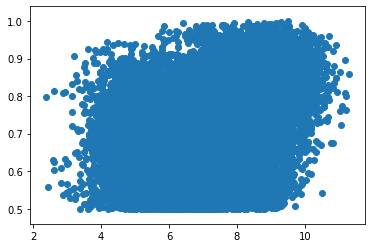

In [208]:
import matplotlib.pyplot as plt
plt.scatter(center_metric, opposing_metric)

In [209]:
# Apply criteria on amalgamation
high_conf = (predictions > (1 - rho))# | (predictions < rho)
high_agr = (center_metric > pi_1) & (opposing_metric > pi_2) & high_conf
high_agr_correct = ((predictions - tar_train['D']).abs() < rho) & high_agr

/zfsauton2/home/mdeartea/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


(array([2130., 3613., 4414., 5098., 4542., 3377., 2181., 1573., 1337.,
        8957.]),
 array([0.01894136, 0.11550908, 0.2120768 , 0.30864452, 0.40521224,
        0.50177996, 0.59834768, 0.6949154 , 0.79148312, 0.88805084,
        0.98461856]),
 <a list of 10 Patch objects>)

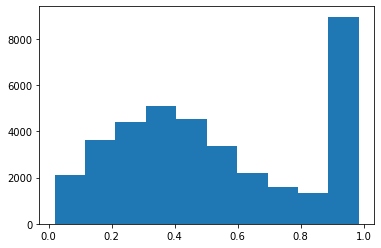

In [210]:
plt.hist(predictions)

In [211]:
print('high_conf:', sum(high_conf))
print('high_agr:', sum(high_agr))
print('high_agr_correct:', sum(high_agr_correct))

high_conf: 1029
high_agr: 443
high_agr_correct: 441


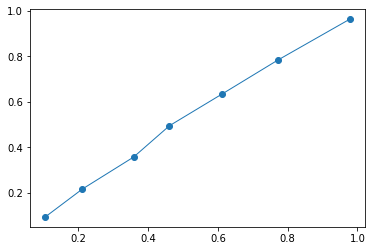

In [212]:
from sklearn.calibration import calibration_curve
prob_true, prob_pred = calibration_curve(tar_train['D'], predictions, n_bins=7)
plt.plot(prob_true,prob_pred, marker='o', linewidth=1, label='logreg')


In [213]:
# Create amalgamated labels
tar_train['Ya'] = tar_train['Y1'].copy()
tar_train['Ya'][high_agr_correct] = (1 - tau) * tar_train['Y1'][high_agr_correct] \
                                    + tau * tar_train['D'][high_agr_correct]

In [214]:
sum(tar_train['D']!=tar_train['Y1'])

18236

In [215]:
sum(tar_train['Ya']!=tar_train['Y1'])

364

In [216]:
#index for selective labels
index_amalg = [i==1.0 for i in tar_train['D']] | high_agr_correct

##### 3. Updated model

In [217]:
#model with selective labels
model = BinaryMLP(**params)
model = model.fit(cov_train[index_amalg], tar_train[index_amalg]['Ya'], nur_train[index_amalg])























  0%|          | 0/1000 [00:00<?, ?it/s]





















Loss: 0.408:   0%|          | 0/1000 [00:00<?, ?it/s]





















Loss: 0.408:   0%|          | 1/1000 [00:00<09:47,  1.70it/s]





















Loss: 0.408:   0%|          | 1/1000 [00:01<09:47,  1.70it/s]





















Loss: 0.408:   0%|          | 2/1000 [00:01<09:47,  1.70it/s]





















Loss: 0.384:   0%|          | 2/1000 [00:01<09:47,  1.70it/s]





















Loss: 0.384:   0%|          | 3/1000 [00:01<09:50,  1.69it/s]





















Loss: 0.388:   0%|          | 3/1000 [00:02<09:50,  1.69it/s]





















Loss: 0.388:   0%|          | 4/1000 [00:02<09:52,  1.68it/s]





















Loss: 0.382:   0%|          | 4/1000 [00:02<09:52,  1.68it/s]





















Loss: 0.382:   0%|          | 5/1000 [00:02<09:51,  1.68it/s]





















Loss: 0.385:   0%|          | 5/1000 [00:03<09:51,  1.68it/s]





















Loss: 0.385

Loss: 0.377:   3%|▎         | 27/1000 [00:16<09:43,  1.67it/s]





















Loss: 0.378:   3%|▎         | 27/1000 [00:16<09:43,  1.67it/s]





















Loss: 0.378:   3%|▎         | 28/1000 [00:16<09:42,  1.67it/s]





















Loss: 0.374:   3%|▎         | 28/1000 [00:17<09:42,  1.67it/s]





















Loss: 0.374:   3%|▎         | 29/1000 [00:17<09:39,  1.68it/s]





















Loss: 0.375:   3%|▎         | 29/1000 [00:17<09:39,  1.68it/s]





















Loss: 0.375:   3%|▎         | 30/1000 [00:17<09:34,  1.69it/s]





















Loss: 0.381:   3%|▎         | 30/1000 [00:18<09:34,  1.69it/s]





















Loss: 0.381:   3%|▎         | 31/1000 [00:18<09:34,  1.69it/s]





















Loss: 0.374:   3%|▎         | 31/1000 [00:19<09:34,  1.69it/s]





















Loss: 0.374:   3%|▎         | 32/1000 [00:19<09:30,  1.70it/s]





















Loss: 0.375:   3%|▎         | 32/1000 [00:19<09:30,  1.70it/s]















In [218]:
Y_pred_amalg_test = model.predict(cov_test)

In [219]:
# #model without selective labels
# model = BinaryMLP(**params)
# model = model.fit(cov_train, tar_train['Ya'], nur_train[index_amalg])

In [220]:
# Naive performance
roc_auc_score(tar_test['Y1'], model.predict(cov_test))

0.792612998685893

In [221]:
# Yc performance
roc_auc_score(tar_test['Y2'],model.predict(cov_test))

0.7283264011399997

In [222]:
roc_auc_score(tar_test['Y3'],model.predict(cov_test))

0.8118266674561416

In [223]:
roc_auc_score(tar_test['D'],model.predict(cov_test))

0.6628751369354469

##### 4. Train on observed data

In [224]:
model = BinaryMLP(**params)
model = model.fit(cov_train[tar_train['D']==1], tar_train['Y1'][tar_train['D']==1], nur_train)
























  0%|          | 0/1000 [00:00<?, ?it/s]






















Loss: 0.383:   0%|          | 0/1000 [00:00<?, ?it/s]






















Loss: 0.383:   0%|          | 1/1000 [00:00<09:06,  1.83it/s]






















Loss: 0.388:   0%|          | 1/1000 [00:01<09:06,  1.83it/s]






















Loss: 0.388:   0%|          | 2/1000 [00:01<09:02,  1.84it/s]






















Loss: 0.366:   0%|          | 2/1000 [00:01<09:02,  1.84it/s]






















Loss: 0.366:   0%|          | 3/1000 [00:01<09:01,  1.84it/s]






















Loss: 0.367:   0%|          | 3/1000 [00:02<09:01,  1.84it/s]






















Loss: 0.367:   0%|          | 4/1000 [00:02<09:01,  1.84it/s]






















Loss: 0.363:   0%|          | 4/1000 [00:02<09:01,  1.84it/s]






















Loss: 0.363:   0%|          | 5/1000 [00:02<08:59,  1.85it/s]






















Loss: 0.363:   0%|          | 5/1000 [00:03<08:59,  1.85it/s]






















Loss: 0.362:   3%|▎         | 26/1000 [00:15<08:57,  1.81it/s]






















Loss: 0.362:   3%|▎         | 27/1000 [00:15<08:51,  1.83it/s]






















Loss: 0.359:   3%|▎         | 27/1000 [00:15<08:51,  1.83it/s]






















Loss: 0.359:   3%|▎         | 28/1000 [00:15<08:54,  1.82it/s]






















Loss: 0.359:   3%|▎         | 28/1000 [00:16<08:54,  1.82it/s]






















Loss: 0.359:   3%|▎         | 29/1000 [00:16<08:50,  1.83it/s]






















Loss: 0.357:   3%|▎         | 29/1000 [00:16<08:50,  1.83it/s]






















Loss: 0.357:   3%|▎         | 30/1000 [00:16<08:48,  1.84it/s]






















Loss: 0.360:   3%|▎         | 30/1000 [00:17<08:48,  1.84it/s]






















Loss: 0.360:   3%|▎         | 31/1000 [00:17<08:44,  1.85it/s]






















Loss: 0.356:   3%|▎         | 31/1000 [00:17<08:44,  1.85it/s]






















Loss: 0.356:   3%|▎         | 32/1000 [00:17<08:55,  1.81it/s]




Loss: 0.384:   5%|▌         | 53/1000 [00:29<08:58,  1.76it/s]






















Loss: 0.391:   5%|▌         | 53/1000 [00:29<08:58,  1.76it/s]

In [225]:
Y_pred_obs_test = model.predict(cov_test)

In [226]:
# Naive performance
roc_auc_score(tar_test['Y1'], model.predict(cov_test))

0.7938324130267778

In [227]:
# Yc performance
roc_auc_score(tar_test['Y2'],model.predict(cov_test))

0.6998782046057457

In [228]:
roc_auc_score(tar_test['Y3'],model.predict(cov_test))

0.7574878216817219

In [229]:
roc_auc_score(tar_test['D'],model.predict(cov_test))

0.6388269384450636

### Human

In [230]:
#if models trained without 1 penalty, retrain f_h
model = BinaryMLP(**params)
model = model.fit(cov_train, tar_train['D'], nur_train)

























  0%|          | 0/1000 [00:00<?, ?it/s]























Loss: 0.573:   0%|          | 0/1000 [00:00<?, ?it/s]























Loss: 0.573:   0%|          | 1/1000 [00:00<16:37,  1.00it/s]























Loss: 0.545:   0%|          | 1/1000 [00:02<16:37,  1.00it/s]























Loss: 0.545:   0%|          | 2/1000 [00:02<16:54,  1.02s/it]























Loss: 0.530:   0%|          | 2/1000 [00:03<16:54,  1.02s/it]























Loss: 0.530:   0%|          | 3/1000 [00:03<16:59,  1.02s/it]























Loss: 0.520:   0%|          | 3/1000 [00:04<16:59,  1.02s/it]























Loss: 0.520:   0%|          | 4/1000 [00:04<16:54,  1.02s/it]























Loss: 0.516:   0%|          | 4/1000 [00:05<16:54,  1.02s/it]























Loss: 0.516:   0%|          | 5/1000 [00:05<16:50,  1.02s/it]























Loss: 0.512:   0%|          | 5/1000 [00:06<16:50,  1.02s/it]










Loss: 0.497:   3%|▎         | 26/1000 [00:26<16:13,  1.00it/s]























Loss: 0.494:   3%|▎         | 26/1000 [00:27<16:13,  1.00it/s]























Loss: 0.494:   3%|▎         | 27/1000 [00:27<16:21,  1.01s/it]























Loss: 0.495:   3%|▎         | 27/1000 [00:28<16:21,  1.01s/it]























Loss: 0.495:   3%|▎         | 28/1000 [00:28<16:18,  1.01s/it]























Loss: 0.494:   3%|▎         | 28/1000 [00:29<16:18,  1.01s/it]























Loss: 0.494:   3%|▎         | 29/1000 [00:29<16:18,  1.01s/it]























Loss: 0.495:   3%|▎         | 29/1000 [00:30<16:18,  1.01s/it]























Loss: 0.495:   3%|▎         | 30/1000 [00:30<16:17,  1.01s/it]























Loss: 0.491:   3%|▎         | 30/1000 [00:31<16:17,  1.01s/it]























Loss: 0.491:   3%|▎         | 31/1000 [00:31<16:23,  1.02s/it]























Loss: 0.495:   3%|▎         | 31/1000 [00:32<16:23,  1

Loss: 0.488:   5%|▌         | 52/1000 [00:52<15:43,  1.00it/s]























Loss: 0.488:   5%|▌         | 52/1000 [00:53<15:43,  1.00it/s]























Loss: 0.488:   5%|▌         | 53/1000 [00:53<15:51,  1.01s/it]























Loss: 0.488:   5%|▌         | 53/1000 [00:54<15:51,  1.01s/it]























Loss: 0.488:   5%|▌         | 54/1000 [00:54<16:25,  1.04s/it]























Loss: 0.487:   5%|▌         | 54/1000 [00:55<16:25,  1.04s/it]























Loss: 0.487:   6%|▌         | 55/1000 [00:55<16:23,  1.04s/it]























Loss: 0.491:   6%|▌         | 55/1000 [00:57<16:23,  1.04s/it]























Loss: 0.491:   6%|▌         | 56/1000 [00:57<16:28,  1.05s/it]























Loss: 0.487:   6%|▌         | 56/1000 [00:58<16:28,  1.05s/it]























Loss: 0.487:   6%|▌         | 57/1000 [00:58<16:30,  1.05s/it]























Loss: 0.491:   6%|▌         | 57/1000 [00:59<16:30,  1

Loss: 0.490:   8%|▊         | 78/1000 [01:19<15:29,  1.01s/it]























Loss: 0.489:   8%|▊         | 78/1000 [01:20<15:29,  1.01s/it]























Loss: 0.489:   8%|▊         | 79/1000 [01:20<15:27,  1.01s/it]























Loss: 0.492:   8%|▊         | 79/1000 [01:21<15:27,  1.01s/it]























Loss: 0.492:   8%|▊         | 80/1000 [01:21<15:30,  1.01s/it]























Loss: 0.493:   8%|▊         | 80/1000 [01:22<15:30,  1.01s/it]























Loss: 0.493:   8%|▊         | 81/1000 [01:22<15:34,  1.02s/it]























Loss: 0.490:   8%|▊         | 81/1000 [01:23<15:34,  1.02s/it]























Loss: 0.490:   8%|▊         | 82/1000 [01:23<15:33,  1.02s/it]























Loss: 0.493:   8%|▊         | 82/1000 [01:24<15:33,  1.02s/it]























Loss: 0.493:   8%|▊         | 83/1000 [01:24<15:23,  1.01s/it]























Loss: 0.491:   8%|▊         | 83/1000 [01:25<15:23,  1

Loss: 0.485:  10%|█         | 103/1000 [01:45<15:05,  1.01s/it]























Loss: 0.485:  10%|█         | 104/1000 [01:45<15:01,  1.01s/it]























Loss: 0.486:  10%|█         | 104/1000 [01:46<15:01,  1.01s/it]























Loss: 0.486:  10%|█         | 105/1000 [01:46<15:00,  1.01s/it]























Loss: 0.487:  10%|█         | 105/1000 [01:47<15:00,  1.01s/it]























Loss: 0.487:  11%|█         | 106/1000 [01:47<14:59,  1.01s/it]























Loss: 0.498:  11%|█         | 106/1000 [01:48<14:59,  1.01s/it]























Loss: 0.498:  11%|█         | 107/1000 [01:48<15:14,  1.02s/it]























Loss: 0.502:  11%|█         | 107/1000 [01:49<15:14,  1.02s/it]

In [231]:
Y_pred_h_test = model.predict(cov_test)

print(roc_auc_score(tar_test['Y1'], model.predict(cov_test)))

print(roc_auc_score(tar_test['Y2'], model.predict(cov_test)))

print(roc_auc_score(tar_test['Y3'], model.predict(cov_test)))

print(roc_auc_score(tar_test['D'], model.predict(cov_test)))

0.676130099767664
0.8561492542414769
0.9733901613037574
0.8677943853737964


#### Hybrid

In [185]:
high_agr.shape

(37222,)

In [186]:
# Y_pred_hybrid_test = np.copy(Y_pred_obs_test)
# Y_pred_hybrid_test[high_agr_test] = Y_pred_h_test[high_agr_test]

## Precision/Accuracy

In [232]:
def eval_pred_outcome(Y_outcome_test, Y_pred_test, Y_h_test, p):
    Y_pred_test_scrin = Y_pred_test[Y_h_test==1]
    Y_outcome_test_scrin = Y_outcome_test[Y_h_test==1]
    #print(sum(Y_outcome_test_scrin))
    idx_25qrtl_pred = np.argsort(Y_pred_test_scrin)[::-1][:int(np.floor(p*len(Y_pred_test_scrin)))]
    #baseline
    baseline = sum(Y_outcome_test_scrin)/len(Y_outcome_test_scrin)
    #print(idx_25qrtl_pred )
    #print(sum(Y_outcome_test_scrin[idx_25qrtl_pred]))
    #precision and recall in top p% highsest scored screen-in
    precision_p = sum(Y_outcome_test_scrin[idx_25qrtl_pred])/len(idx_25qrtl_pred)
    recall_p = sum(Y_outcome_test_scrin[idx_25qrtl_pred])/sum(Y_outcome_test)
    
    return baseline, precision_p, recall_p

In [233]:
print('Eval resp. Y_obs')
print('f_y', eval_pred_outcome(np.array(tar_test['Y1']).flatten(), Y_pred_obs_test.flatten(), np.array(tar_test['D']==1).flatten(), 0.25))
print('f_A', eval_pred_outcome(np.array(tar_test['Y1']).flatten(), Y_pred_amalg_test.flatten(), np.array(tar_test['D']==1).flatten(), 0.25))
print('f_h', eval_pred_outcome(np.array(tar_test['Y1']).flatten(), Y_pred_h_test.flatten(), np.array(tar_test['D']==1).flatten(), 0.25))

Eval resp. Y_obs
f_y (0.12117576484703059, 0.2856, 0.4582798459563543)
f_A (0.12117576484703059, 0.2776, 0.4454428754813864)
f_h (0.12117576484703059, 0.1872, 0.30038510911424904)


In [234]:
print('Eval resp. Y_serv')
print('f_y', eval_pred_outcome(np.array(tar_test['Y2']).flatten(), Y_pred_obs_test.flatten(), np.array(tar_test['D']==1).flatten(), 0.25))
print('f_A', eval_pred_outcome(np.array(tar_test['Y2']).flatten(), Y_pred_amalg_test.flatten(), np.array(tar_test['D']==1).flatten(), 0.25))
print('f_h', eval_pred_outcome(np.array(tar_test['Y2']).flatten(), Y_pred_h_test.flatten(), np.array(tar_test['D']==1).flatten(), 0.25))

Eval resp. Y_serv
f_y (0.4231153769246151, 0.6144, 0.3629489603024575)
f_A (0.4231153769246151, 0.6496, 0.3837429111531191)
f_h (0.4231153769246151, 0.6936, 0.40973534971644615)


In [235]:
print('Eval resp. Y_sub')
print('f_y', eval_pred_outcome(np.array(tar_test['Y3']).flatten(), Y_pred_obs_test.flatten(), np.array(tar_test['D']==1).flatten(), 0.25))
print('f_A', eval_pred_outcome(np.array(tar_test['Y3']).flatten(), Y_pred_amalg_test.flatten(), np.array(tar_test['D']==1).flatten(), 0.25))
print('f_h', eval_pred_outcome(np.array(tar_test['Y3']).flatten(), Y_pred_h_test.flatten(), np.array(tar_test['D']==1).flatten(), 0.25))

Eval resp. Y_sub
f_y (0.4527094581083783, 0.7368, 0.40680212014134276)
f_A (0.4527094581083783, 0.8136, 0.44920494699646646)
f_h (0.4527094581083783, 0.9776, 0.5397526501766784)


In [191]:
def eval_pred(Y_pred_test, tar_test, p):
    dic_k_Y_pred = {}
    
    base_ooh, precision_ooh, recall_ooh = eval_pred_outcome(np.array(tar_test['Y1']).flatten(), Y_pred_test.flatten(), np.array(tar_test['D']==1).flatten(), p)
    base_serv, precision_serv, recall_serv = eval_pred_outcome(np.array(tar_test['Y2']).flatten(), Y_pred_test.flatten(), np.array(tar_test['D']==1).flatten(), p)
    base_sub, precision_sub, recall_sub = eval_pred_outcome(np.array(tar_test['Y3']).flatten(), Y_pred_test.flatten(), np.array(tar_test['D']==1).flatten(), p)
    
    dic_k_Y_pred['ooh'] = {'base': float(base_ooh), 'precision': float(precision_ooh), 'recall': float(recall_ooh)}
    dic_k_Y_pred['sub'] = {'base': float(base_sub), 'precision': float(precision_sub), 'recall': float(recall_sub)}
    dic_k_Y_pred['serv'] = {'base': float(base_serv), 'precision': float(precision_serv), 'recall': float(recall_serv)}
    
    return dic_k_Y_pred
    

In [192]:
def eval_k_iter(Y_pred_obs_test, Y_pred_amalg_test, Y_pred_h_test, tar_test, p):
    dic_eval = {}
    
    dic_k = {}
    dic_k['Y_pred_obs_test'] = eval_pred(Y_pred_obs_test, tar_test, p)
    dic_k['Y_pred_h_test'] = eval_pred(Y_pred_h_test, tar_test, p)
    #dic_k['Y_pred_hybrid_test'] = eval_pred(Y_pred_hybrid_test, Y_h, Y_ooh, Y_serv, Y_sub, refer_ids_test, refer_ids, p)
    #print('done with Y_pred_hyb_test')
    dic_k['Y_pred_amalg_test'] = eval_pred(Y_pred_amalg_test, tar_test, p)

    
    dic_eval[0] = dic_k
    
    return dic_eval

In [193]:
list_dics =[]
for p in np.arange(0.05, 0.4, 0.05):
    list_dics.append(eval_k_iter(Y_pred_obs_test, Y_pred_amalg_test, Y_pred_h_test, tar_test, p))

In [194]:
dic_25 = eval_k_iter(Y_pred_obs_test, Y_pred_amalg_test, Y_pred_h_test, tar_test, 0.25)


In [195]:
def plot_perf_bar(dic_eval, models = ['Y_pred_obs_test', 'Y_pred_h_test',
                                     'Y_pred_hybrid_test', 'Y_pred_amalg_test'], 
                  plot_labels = [ '$f_y$', '$f_h$', '$f_\mathcal{hyb}$',  '$f_\mathcal{A}$' ] ,
                  labels = ['ooh', 'sub', 'serv'], y_max=1.05, legend_appear=True,
                  metric ='precision', fig_title='fig_noname'):
    
    K = len(dic_eval.keys())
    
    n_labels = len(labels)
    
    fig, ax = plt.subplots(figsize=(10,5))
    index = np.arange(n_labels)
    bar_width = 0.15
    opacity = 0.8
    colors = ['green', 'darkred', 'yellow', 'blue']
    hatches = ['//', '-', '\\', '.']
    
    
    m_idx =0
    for m in models:
        plot_mean = [0]*n_labels
        plot_std = [0]*n_labels
        
        l_idx = 0
        for l in labels:
            metric_list = [0]*K
            if metric == 'precision':
                for k in range(K):
                    metric_list[k] = dic_eval[k][m][l]['precision']
            
            if metric == 'recall':
                for k in range(K):
                    metric_list[k] = dic_eval[k][m][l]['recall']
            plot_mean[l_idx] = np.mean(metric_list)  
            plot_std[l_idx] = np.std(metric_list)  
            l_idx += 1
        rects = plt.bar(index+m_idx*bar_width, plot_mean, yerr= plot_std,
            alpha=opacity, color=colors[m_idx], capsize=7,  width=.1, hatch = hatches[m_idx],
                            label=plot_labels[m_idx])        
            
            
        m_idx+=1                
    
    
    for n in index[:-1]:
        if metric=='precision':
            t= 0.8
        else:
            t=0.7
        plt.axvline(x=n+t, color='grey', linestyle='--')
        
    if metric=='precision':
        plot_mean = [0]*n_labels
        plot_std = [0]*n_labels
        l_idx = 0
        for l in labels:
            metric_list = [0]*K
            for k in range(K):
                metric_list[k] = dic_eval[k][m][l]['base']
            plot_mean[l_idx] = np.mean(metric_list)  
            plot_std[l_idx] = np.std(metric_list) 
            l_idx +=1
        rects = plt.bar(index+len(models)*bar_width, plot_mean, yerr= plot_std,
            alpha=opacity, color='grey',capsize=7,  width=.1,label='Overall prev.')     

    plt.ylabel(metric,fontsize=25)
    #plt.ylim((0,1.05))
    #plt.title('Performance of outcomes by model',fontsize=18)
    plt.xticks(index + 1.5*bar_width, ('OOH', 'Substantiated', 'Services'),fontsize=18)
    plt.yticks(fontsize=16)
    if legend_appear==True:
        plt.legend(loc = 'upper left', fontsize=18)
    plt.ylim(0.0,y_max)
    plt.tight_layout()

#     plt.savefig(fig_title, dpi=300,
#             orientation='portrait' )
    plt.show()

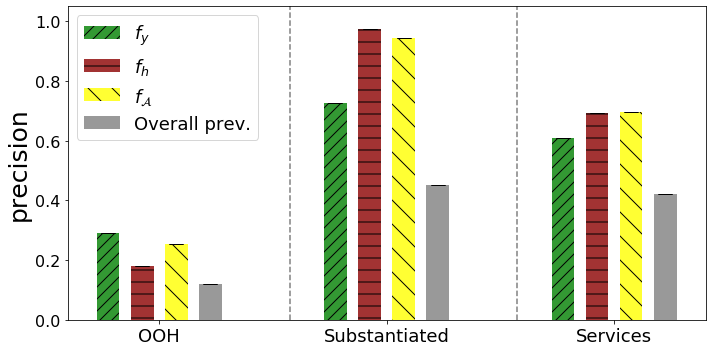

In [196]:
plot_perf_bar(dic_25, models = ['Y_pred_obs_test', 'Y_pred_h_test', 'Y_pred_amalg_test'], 
                  plot_labels = [ '$f_y$', '$f_h$',   '$f_\mathcal{A}$' ])

In [197]:
def plot_perf_bar(list_dics, index = np.arange(0.05, 0.4, 0.05), models = ['Y_pred_obs_test', 'Y_pred_h_test',
                                     'Y_pred_hybrid_test', 'Y_pred_amalg_test'], 
                  plot_labels = [ '$f_y$', '$f_h$', '$f_\mathcal{hyb}$',  '$f_\mathcal{A}$' ] ,
                  labels = ['ooh', 'sub', 'serv'], y_max=1.05, legend_appear=True,
                  metric ='precision', fig_title='fig_noname'):
    
    K = len(list_dics[0].keys())
    
    n_groups = len(labels)
    
    fig, ax_list = plt.subplots(1,n_groups, figsize=(14,5))
    N=len(list_dics)
    
    bar_width = 0.1
    opacity = 0.8
    colors = ['green', 'darkred', 'goldenrod', 'blue']
    hatches = ['//', '-', '\\', '.']
    l_idx = 0
    for l in labels:
        m_idx =0
        for m in models:
            plot_mean = [0]*N
            plot_std = [0]*N

            dic_idx = 0
            for dic_eval in list_dics:
                metric_list = [0]*K
                if metric == 'precision':
                    for k in range(K):
                        metric_list[k] = dic_eval[k][m][l]['precision']

                if metric == 'recall':
                    for k in range(K):
                        metric_list[k] = dic_eval[k][m][l]['recall']
                plot_mean[dic_idx] = np.mean(metric_list)  
                plot_std[dic_idx] = np.std(metric_list)  
                dic_idx += 1
            ax_list[l_idx].errorbar(index, plot_mean, yerr= plot_std,
                alpha=opacity, color=colors[m_idx], capsize=7, 
                               label=plot_labels[m_idx])        
#             else:
#                 ax_list[l_idx].errorbar(index, plot_mean, yerr= plot_std,
#                 alpha=opacity, color=colors[m_idx], capsize=7)     

            m_idx+=1                
        

#         for n in index[:-1]:
#             if metric=='precision':
#                 t= (len(list_dics)-1)*bar_width+0.2
#             else:
#                 t= len(list_dics)*bar_width
#             plt.axvline(x=n+t, color='grey', linestyle='--')

        if metric=='precision':
            plot_mean = [0]*N
            plot_std = [0]*N
            dic_idx = 0
            for dic_eval in list_dics:
                metric_list = [0]*K
                for k in range(K):
                    metric_list[k] = dic_eval[k][m][l]['base']
                plot_mean[dic_idx] = np.mean(metric_list)  
                plot_std[dic_idx] = np.std(metric_list) 
                dic_idx +=1
            ax_list[l_idx].errorbar(index, plot_mean, yerr= plot_std,
                alpha=opacity, color='grey',capsize=7, label='base')     
#             else:
#                 ax_list[l_idx].errorbar(index, plot_mean, yerr= plot_std,
#                 alpha=opacity, color='grey',capsize=7)     
        l_idx+=1
        
        
   # plt.ylabel(metric,fontsize=25)
    ax_list[0].set_ylabel(metric,fontsize=20)
    ax_list[1].set_xlabel('top p%',fontsize=20)
    
    for k in range(n_groups):
        ax_list[k].set_title(labels[k],fontsize=20)
    
    
    ax_list[2].legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=18)
    
    #ax_list[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
        #  fancybox=True, shadow=True, ncol=5)
    
    #plt.xticks(index+dic_idx*bar_width)
    
#     plt.yticks(fontsize=16)
#     if legend_appear==True:
#         plt.legend(loc = 'upper left', fontsize=18)
    #plt.ylim(0.0,y_max)
    #plt.tight_layout()

#     plt.savefig(fig_title, dpi=300,
#             orientation='portrait' )
    plt.show()

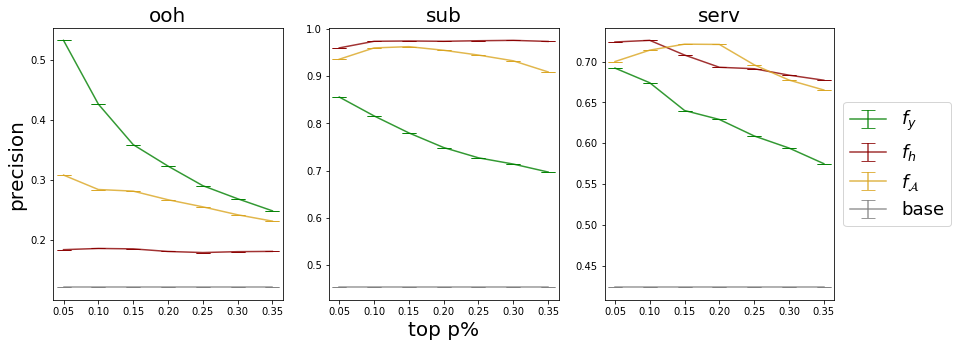

In [198]:
plot_perf_bar(list_dics, index = np.arange(0.05, 0.4, 0.05), models = ['Y_pred_obs_test', 'Y_pred_h_test','Y_pred_amalg_test'], 
                  plot_labels = [ '$f_y$', '$f_h$',  '$f_\mathcal{A}$' ])